# MNIST
>28x28 크기의 흑백 손글씨 이미지로 이루어진 데이터셋입니다. 손글씨 숫자를 0부터 9까지 10개의 클래스로 분류하는 문제입니다. MNIST는 이미지 분류 문제를 해결하는 데 사용되는 가장 유명한 데이터셋 중 하나입니다.

In [1]:
#케라스 모듈에서 MNIST 데이터셋을 로드

from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

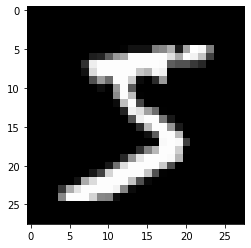

In [2]:
각 객체는 28by 28 2차원 데이터입니다.  
0 ~ 255사이의 값을 가지며 픽셀의 밝기를 나타냅니다.

import numpy as np 
np.set_printoptions(linewidth=200,threshold=1000)

print(train_images[0])

import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap=plt.cm.gray)

In [3]:
#데이터 shape 확인
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


TypeError: Invalid shape (3072,) for image data

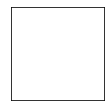

In [81]:
#데이터 시각화
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

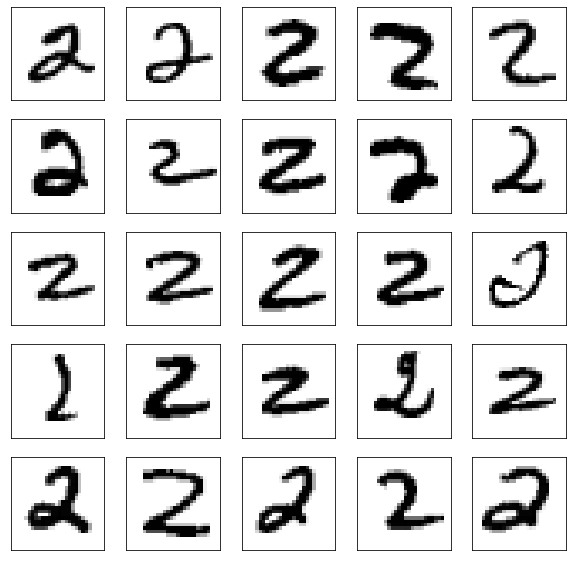

In [5]:
#라벨이 2인 데이터 출력하기
import numpy as np
idx = np.where(train_labels == 2)[0]

plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[idx[i]], cmap=plt.cm.binary)

Sequential API를 이용한 MLP모델 만들기

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [7]:
model = Sequential([
    layers.Dense(50, input_shape=(784,), activation="relu"),
    layers.Dense(60, activation = "relu"),
    layers.Dense(10, activation="softmax")
])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 60)                3060      
                                                                 
 dense_2 (Dense)             (None, 10)                610       
                                                                 
Total params: 42,920
Trainable params: 42,920
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

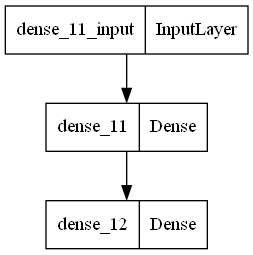

In [82]:
#plot_model을 활용하여 신경망 시각화  
#show_shape = True를 이용해 입출력 데이터의 shape을 표시할 수 있다.

from tensorflow.keras.utils import plot_model

plot_model(model)

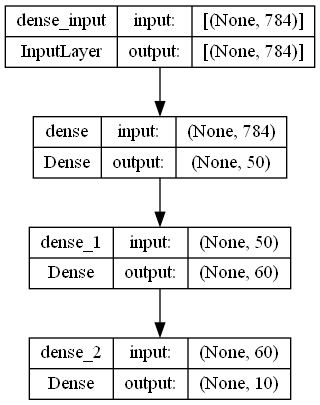

In [9]:
plot_model(model, show_shapes=True)

In [11]:
#데이터 스케일링, flatten
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images / 255

In [12]:
model.fit(train_images, train_labels, epochs = 5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.4265 - accuracy: 0.8788
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1748 - accuracy: 0.9488
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1350 - accuracy: 0.9609
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1099 - accuracy: 0.9668
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0939 - accuracy: 0.9718


In [13]:
#스케일링 되지 않은 데이터로 진행한다면?
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

In [14]:
model.fit(train_images, train_labels, epochs = 5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 9.5224 - accuracy: 0.9516
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 2.6426 - accuracy: 0.9630
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 1.4956 - accuracy: 0.9680
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 1.0593 - accuracy: 0.9721
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.7677 - accuracy: 0.9748


In [15]:
#to_categorical를 이용해 원 핫 인코딩

from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images / 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

print(train_labels_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [16]:
#원핫 인코딩을 loss function을 `categorical_crossentropy`로 설정해야한다.

model = Sequential([
    layers.Dense(50, input_shape=(784,), activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="RMSprop",
              loss="categorical_crossentropy",
              metrics="accuracy")

history = model.fit(train_images, train_labels_one_hot, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.4146 - accuracy: 0.8893
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.2043 - accuracy: 0.9422
Epoch 3/5
469/469 [==============================] - 0s 1ms/step - loss: 0.1599 - accuracy: 0.9544
Epoch 4/5
469/469 [==============================] - 0s 998us/step - loss: 0.1333 - accuracy: 0.9615
Epoch 5/5
469/469 [==============================] - 0s 1ms/step - loss: 0.1147 - accuracy: 0.9669


In [17]:
history.history

{'loss': [0.41455110907554626,
  0.20425379276275635,
  0.1599455028772354,
  0.1332980990409851,
  0.11474628001451492],
 'accuracy': [0.8892999887466431,
  0.9422333240509033,
  0.9544000029563904,
  0.9614999890327454,
  0.9668999910354614]}

모델평가

In [18]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images / 255

model = Sequential([
    layers.Dense(512, input_shape=(784,), activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="RMSprop",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

model.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\n")
print(f"test_acc: {test_acc}")

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2577 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1043 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0686 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0500 - accuracy: 0.9850
Epoch 5/5
313/313 [==============================] - 0s 853us/step - loss: 0.0656 - accuracy: 0.9793


test_acc: 0.9793000221252441


In [19]:
predictions = model.predict(test_images)
print(predictions[0])
confusion = np.zeros((10,10), dtype=int)

for k in range(len(test_images)):
    i = test_labels[k]
    j = np.argmax(predictions[k])
    confusion[i][j] += 1
    
print(confusion)

313/313 [==============================] - 0s 723us/step
[6.8138117e-10 6.5454336e-10 2.8591451e-06 7.6303550e-05 5.2366362e-12 4.4551136e-08 6.8253088e-14 9.9991989e-01 7.8538839e-08 9.1559627e-07]
[[ 970    0    2    1    1    1    1    1    3    0]
 [   0 1127    3    0    0    0    2    0    3    0]
 [   2    1 1011    2    1    0    2    5    8    0]
 [   0    0    6  970    0   21    0    5    6    2]
 [   1    0    3    0  966    0    2    1    1    8]
 [   2    0    0    1    1  882    2    0    3    1]
 [   4    3    1    1    8    8  932    0    1    0]
 [   1    3   10    0    1    0    0 1006    1    6]
 [   3    0    5    1    4    4    2    3  950    2]
 [   2    3    0    4    7    4    1    6    3  979]]


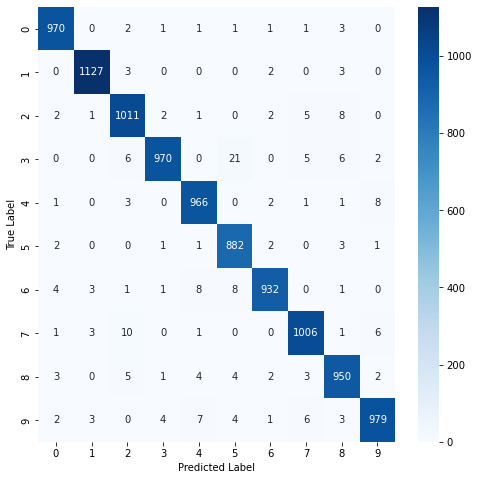

In [20]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Precision, Recall, F1-Score를 출력  
- TP : True Posive, FP : False Positive, TN : True Negative, FN : False Negative
- $\rm Precision = {TP \over TP+FP}$
- $\rm Recall = {TP \over TP+FN}$
- $\rm {1 \over F1-Score} = {1 \over 2}\left({1 \over Precision} + {1 \over F1-Score}\right)$
- support : 라벨 개수

In [21]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.96      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.99      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



------------
# Fashion MNIST
>28x28 크기의 흑백 의류 이미지로 이루어진 데이터셋입니다. 10개의 클래스 중 하나로 각각의 이미지가 분류됩니다. 이 데이터셋은 MNIST 데이터셋과 유사하지만 의류 이미지 분류 문제를 해결하는 데 사용됩니다.

케라스 모듈에서 Fashion MNIST 데이터셋을 로드  
MLP를 이용해 다중분류를 진행

In [22]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [23]:
#0부터 9까지의 라벨은 다음과 같은 패션 아이템과 대응합니다.

import numpy as np
np.set_printoptions(linewidth=200,threshold=1000)

print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

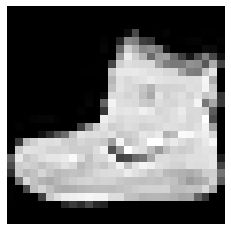

In [24]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(train_images[0], cmap=plt.cm.gray)
plt.show()

In [25]:
class_names=['Tshirt/top','Troser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [26]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


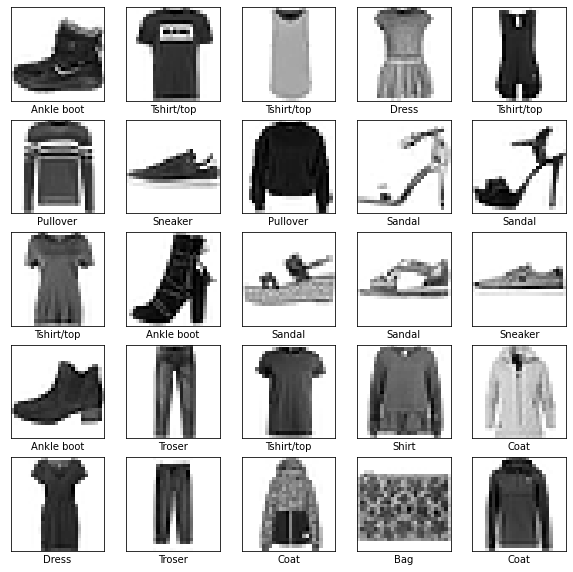

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [28]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images / 255 

In [34]:
model = Sequential([
    layers.Dense(512, input_shape=(784,), activation = "relu"),
    layers.Dense(10, activation = "softmax") 
])

model.compile(optimizer="RMSprop",
              loss = "sparse_categorical_crossentropy",
              metrics = "accuracy")

In [35]:
model.fit(train_images, train_labels, epochs = 5, batch_size=128)

test_loss, test_acc = model.evaluate(test_images, test_labels)


print(f"test_acc: {test_acc}")

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5651 - accuracy: 0.8008
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3811 - accuracy: 0.8593
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3362 - accuracy: 0.8766
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3103 - accuracy: 0.8857
Epoch 5/5
313/313 [==============================] - 0s 692us/step - loss: 0.3448 - accuracy: 0.8813
test_acc: 0.8812999725341797


313/313 [==============================] - 0s 664us/step
[4.6706924e-07 1.4260157e-10 1.7188817e-08 5.6222266e-10 1.1301636e-08 1.2302874e-02 1.7351931e-07 1.5617247e-02 2.3934341e-05 9.7205520e-01]


Text(0.5, 0, 'Ankle boot')

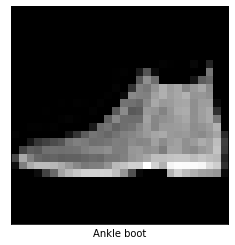

In [36]:
predictions = model.predict(test_images)
print(predictions[0])

plt.imshow(test_images[0].reshape(28,28), cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.xlabel(class_names[test_labels[0]])

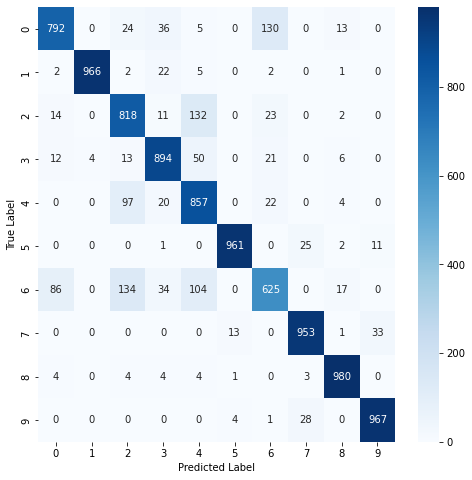

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1000
           1       1.00      0.97      0.98      1000
           2       0.75      0.82      0.78      1000
           3       0.87      0.89      0.88      1000
           4       0.74      0.86      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.76      0.62      0.69      1000
           7       0.94      0.95      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [58]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

plt.figure(figsize=(8,8))
confusion = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(test_labels, np.argmax(predictions, axis=1)))

In [69]:
for i in range(10):
    confusion[i][i]=0
print(confusion,np.argmax(confusion)%10)
print(class_names)
class_names[answer]

[[  0   0  24  36   5   0 130   0  13   0]
 [  2   0   2  22   5   0   2   0   1   0]
 [ 14   0   0  11 132   0  23   0   2   0]
 [ 12   4  13   0  50   0  21   0   6   0]
 [  0   0  97  20   0   0  22   0   4   0]
 [  0   0   0   1   0   0   0  25   2  11]
 [ 86   0 134  34 104   0   0   0  17   0]
 [  0   0   0   0   0  13   0   0   1  33]
 [  4   0   4   4   4   1   0   3   0   0]
 [  0   0   0   0   0   4   1  28   0   0]] 2
['Tshirt/top', 'Troser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


'Pullover'

Shirt→Pullover


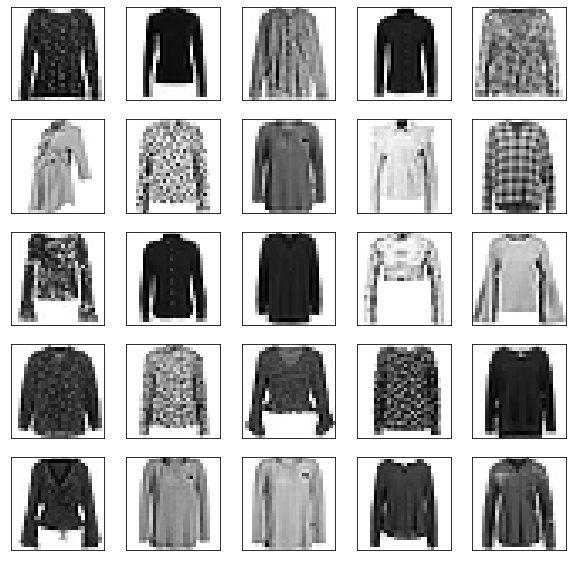

In [51]:
#가장 많이 착각한 패션 아이템 시각회

for i in range(10):
    confusion[i][i]=0

true=np.argmax(confusion)//10
answer=np.argmax(confusion)%10
print(str(class_names[true])+"→"+str(class_names[answer]))

idx=[]

for i in range(len(test_images)):
    if test_labels[i]==true and np.argmax(predictions[i])==answer:
        idx.append(i)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.imshow(test_images[idx[i]].reshape(28,28), cmap=plt.cm.binary)

------
# CIFAR10
>32x32 크기의 컬러 이미지로 이루어진 데이터셋입니다. 10개의 클래스로 이루어져 있으며, 각각의 클래스는 비슷한 속성을 가진 이미지들로 구성되어 있습니다. CIFAR-10은 MNIST와 Fashion MNIST와 달리 컬러 이미지 분류 문제를 해결하는 데 사용됩니다.


케라스 모듈에서 CIFAR10 데이터셋을 로드

In [71]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [72]:
#3차원의 rgb채널을 가지는 데이터이기 때문에 numberic한 식별이 어렵다.

print(train_images[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


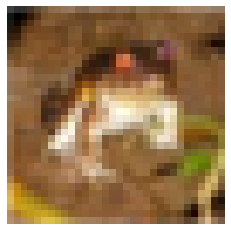

[6]


In [74]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(train_images[0])
plt.show()
print(train_labels[0])

In [75]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

In [76]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


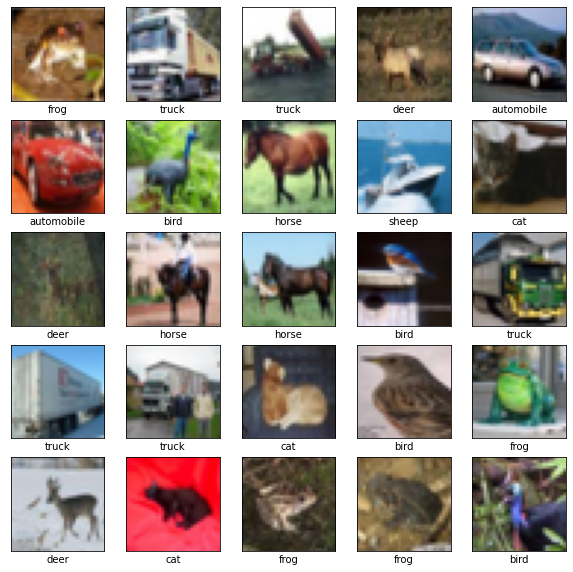

In [77]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [78]:
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images / 255

In [80]:
model = Sequential([
    layers.Dense(512, input_shape=(32 * 32 * 3,), activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="RMSprop",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

model.fit(train_images, train_labels, epochs=15, batch_size=128)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\n")
print(f"test_acc: {test_acc}")

Epoch 1/15
391/391 [==============================] - 7s 17ms/step - loss: 2.4924 - accuracy: 0.2442
Epoch 2/15
391/391 [==============================] - 7s 18ms/step - loss: 1.8256 - accuracy: 0.3487
Epoch 3/15
391/391 [==============================] - 7s 18ms/step - loss: 1.7229 - accuracy: 0.3888
Epoch 4/15
391/391 [==============================] - 7s 17ms/step - loss: 1.6610 - accuracy: 0.4115
Epoch 5/15
391/391 [==============================] - 6s 16ms/step - loss: 1.6186 - accuracy: 0.4274
Epoch 6/15
391/391 [==============================] - 6s 17ms/step - loss: 1.5845 - accuracy: 0.4397
Epoch 7/15
391/391 [==============================] - 6s 16ms/step - loss: 1.5622 - accuracy: 0.4478
Epoch 8/15
391/391 [==============================] - 7s 17ms/step - loss: 1.5355 - accuracy: 0.4565
Epoch 9/15
391/391 [==============================] - 7s 17ms/step - loss: 1.5148 - accuracy: 0.4650
Epoch 10/15
391/391 [==============================] - 7s 17ms/step - loss: 1.4961 - accura

----
# CIFAR100
32x32 크기의 이미지를 100개의 클래스로 분류하도록 되어 있습니다.
CIFAR-100 데이터셋의 클래스는 크게 20개의 초목, 20개의 동물, 20개의 자동차, 20개의 비행기, 그리고 20개의 물고기로 구성되어 있습니다. 각 클래스는 600개의 이미지로 이루어져 있습니다.
CIFAR-100 데이터셋은 컴퓨터 비전 분야에서 이미지 분류 모델의 성능을 평가하고 비교하는데 널리 사용됩니다. 이 데이터셋은 딥러닝 모델의 학습과 평가를 위한 벤치마크로 사용되며, 최신 딥러닝 모델의 성능을 비교하는 대회에서도 종종 사용됩니다.